In [1]:
import pandas as pd

In [2]:
# results = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230712_215840-ktr1ito1/files/ckpt_epoch=23_updates=753.csv')
results = pd.read_csv('/scratch/mcinerney.de/ehr-diagnosis-agent-output/wandb/run-20230717_000206-spuih2t3/files/ckpt_epoch=9_updates=279.csv')
results['neg_time_to_target'] = -results['time_to_target']
results

,time_step,target,time_to_target,is_positive,is_current_target,top_1,top_2,top_5,top_1_deterministic,top_2_deterministic,top_5_deterministic,episode_idx,neg_time_to_target
0,1,pneumonia,NaN,True,False,True,True,True,False,True,True,1,NaN
1,1,pulmonary edema,8.0,True,True,False,True,True,True,True,True,1,-8.0
2,3,pneumonia,NaN,True,False,True,True,True,False,True,True,1,NaN
3,3,pulmonary edema,7.0,True,True,False,True,True,True,True,True,1,-7.0
4,5,pneumonia,NaN,True,False,False,True,True,True,True,True,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18305,3,pulmonary edema,3.0,True,True,False,True,True,False,True,True,6916,-3.0
18306,5,pneumonia,NaN,True,False,False,True,True,False,True,True,6916,NaN
18307,5,pulmonary edema,2.0,True,True,True,True,True,True,True,True,6916,-2.0
18308,7,pneumonia,NaN,True,False,True,True,True,False,True,True,6916,NaN


In [3]:
from train import log_results
log_results(results)

/work/frink/mcinerney.de/envs/ehragent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'val_precision_micro': 0.5570726379027854,
 'val_recall_micro': 0.4997550220480157,
 'val_precision_det_micro': 0.5381758601856909,
 'val_recall_det_micro': 0.48280254777070064,
 'val_precision_macro': 0.5564824106355815,
 'val_precision_det_macro': 0.5668338830307991,
 'val_recall_macro': 0.49910344701462717,
 'val_recall_det_macro': 0.5024065063721342,
 'pulmonary edema/val_precision': 0.6099827139152982,
 'pulmonary edema/val_precision_det': 0.6323757763975155,
 'pulmonary edema/val_recall': 0.5060953746862675,
 'pulmonary edema/val_recall_det': 0.2920401577626389,
 'pneumonia/val_precision': 0.5029821073558648,
 'pneumonia/val_precision_det': 0.5012919896640827,
 'pneumonia/val_recall': 0.4921115193429868,
 'pneumonia/val_recall_det': 0.7127728549816296}

In [38]:
pneumonia_positive = results[(results.target=='pneumonia') & results.is_current_target].groupby('episode_idx').agg(
    {'top_1_deterministic': 'mean', 'top_1': 'mean'}).reset_index().sort_values(['top_1_deterministic', 'top_1'])[-20:]
pneumonia_positive

,episode_idx,top_1_deterministic,top_1
136,2744,1.0,0.625000
263,5274,1.0,0.642857
228,4692,1.0,0.645161
3,154,1.0,0.666667
208,4174,1.0,0.666667
306,5971,1.0,0.666667
311,6079,1.0,0.666667
328,6319,1.0,0.666667
156,3182,1.0,0.708333
307,5980,1.0,0.736842


In [39]:
pe_set = set(results[(results.target=='pulmonary edema') & results.is_current_target].episode_idx)
set(pneumonia_positive.episode_idx).difference(pe_set)

{154,
 1019,
 2091,
 2744,
 3182,
 4523,
 4692,
 4925,
 5274,
 5971,
 5980,
 6079,
 6319,
 6432,
 6618,
 6730}

{1,
 20,
 76,
 84,
 89,
 96,
 105,
 114,
 137,
 161,
 193,
 195,
 210,
 245,
 256,
 265,
 278,
 293,
 324,
 351,
 355,
 370,
 392,
 408,
 410,
 420,
 441,
 443,
 449,
 480,
 484,
 506,
 508,
 518,
 535,
 547,
 554,
 577,
 597,
 625,
 648,
 652,
 660,
 759,
 765,
 785,
 852,
 855,
 864,
 896,
 908,
 934,
 940,
 980,
 997,
 1007,
 1025,
 1052,
 1063,
 1072,
 1090,
 1094,
 1096,
 1113,
 1118,
 1144,
 1146,
 1155,
 1171,
 1182,
 1187,
 1196,
 1210,
 1223,
 1275,
 1276,
 1284,
 1293,
 1330,
 1362,
 1365,
 1373,
 1390,
 1411,
 1468,
 1485,
 1507,
 1524,
 1550,
 1585,
 1586,
 1592,
 1598,
 1607,
 1639,
 1664,
 1671,
 1673,
 1679,
 1694,
 1697,
 1803,
 1830,
 1844,
 1848,
 1867,
 1884,
 1907,
 1943,
 1973,
 1981,
 2003,
 2021,
 2039,
 2043,
 2050,
 2068,
 2073,
 2079,
 2087,
 2138,
 2188,
 2195,
 2198,
 2207,
 2214,
 2264,
 2267,
 2278,
 2280,
 2303,
 2310,
 2339,
 2382,
 2389,
 2404,
 2419,
 2436,
 2453,
 2462,
 2463,
 2466,
 2475,
 2535,
 2540,
 2554,
 2570,
 2580,
 2589,
 2598,
 2605,
 2639

In [4]:
results[results.target=='pulmonary edema']

,time_step,target,time_to_target,is_positive,is_current_target,top_1,top_2,top_5,top_1_deterministic,top_2_deterministic,top_5_deterministic,episode_idx,neg_time_to_target
1,1,pulmonary edema,8.0,True,True,False,True,True,True,True,True,1,-8.0
3,3,pulmonary edema,7.0,True,True,False,True,True,True,True,True,1,-7.0
5,5,pulmonary edema,6.0,True,True,True,True,True,False,True,True,1,-6.0
7,7,pulmonary edema,5.0,True,True,False,True,True,False,True,True,1,-5.0
9,9,pulmonary edema,4.0,True,True,False,True,True,False,True,True,1,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18301,71,pulmonary edema,1.0,True,True,False,True,True,False,True,True,6881,-1.0
18303,1,pulmonary edema,4.0,True,True,False,True,True,True,True,True,6916,-4.0
18305,3,pulmonary edema,3.0,True,True,False,True,True,False,True,True,6916,-3.0
18307,5,pulmonary edema,2.0,True,True,True,True,True,True,True,True,6916,-2.0


In [5]:
results[results.target=='pneumonia']

,time_step,target,time_to_target,is_positive,is_current_target,top_1,top_2,top_5,top_1_deterministic,top_2_deterministic,top_5_deterministic,episode_idx,neg_time_to_target
0,1,pneumonia,NaN,True,False,True,True,True,False,True,True,1,NaN
2,3,pneumonia,NaN,True,False,True,True,True,False,True,True,1,NaN
4,5,pneumonia,NaN,True,False,False,True,True,True,True,True,1,NaN
6,7,pneumonia,NaN,True,False,True,True,True,True,True,True,1,NaN
8,9,pneumonia,NaN,True,False,True,True,True,True,True,True,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18300,71,pneumonia,NaN,True,False,True,True,True,True,True,True,6881,NaN
18302,1,pneumonia,NaN,True,False,True,True,True,False,True,True,6916,NaN
18304,3,pneumonia,NaN,True,False,True,True,True,True,True,True,6916,NaN
18306,5,pneumonia,NaN,True,False,False,True,True,False,True,True,6916,NaN


NameError: name 'results' is not defined

In [6]:
{t: results[(results.target==t)].top_1.mean() for t in set(results.target)}

{'pulmonary edema': 0.5055161114145276, 'pneumonia': 0.49448388858547243}

In [7]:
{t: results[(results.target==t)].top_1_deterministic.mean() for t in set(results.target)}

{'pulmonary edema': 0.2813762971054069, 'pneumonia': 0.7186237028945931}

In [8]:
{t: results[(results.target==t) & results.top_1].is_current_target.mean() for t in set(results.target)}


{'pulmonary edema': 0.6099827139152982, 'pneumonia': 0.5029821073558648}

In [9]:
{t: results[(results.target==t) & results.top_1_deterministic].is_current_target.mean() for t in set(results.target)}

{'pulmonary edema': 0.6323757763975155, 'pneumonia': 0.5012919896640827}

In [10]:
{t: results[(results.target==t) & results.is_current_target].top_1.mean() for t in set(results.target)}

{'pulmonary edema': 0.5060953746862675, 'pneumonia': 0.4921115193429868}

In [11]:
{t: results[(results.target==t) & results.is_current_target].top_1_deterministic.mean() for t in set(results.target)}

{'pulmonary edema': 0.2920401577626389, 'pneumonia': 0.7127728549816296}

,target,neg_time_to_target,time_step,time_to_target,is_positive,is_current_target,top_1,top_2,top_5,top_1_deterministic,top_2_deterministic,top_5_deterministic,episode_idx
0,pneumonia,-44.0,1.000000,44.0,1.0,1.0,0.333333,1.0,1.0,0.333333,1.0,1.0,4706.000000
1,pneumonia,-43.0,2.500000,43.0,1.0,1.0,0.500000,1.0,1.0,0.250000,1.0,1.0,4022.750000
2,pneumonia,-42.0,3.333333,42.0,1.0,1.0,0.500000,1.0,1.0,0.333333,1.0,1.0,4686.333333
3,pneumonia,-41.0,3.888889,41.0,1.0,1.0,0.555556,1.0,1.0,0.333333,1.0,1.0,4244.777778
4,pneumonia,-40.0,5.000000,40.0,1.0,1.0,0.545455,1.0,1.0,0.181818,1.0,1.0,3708.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pulmonary edema,-5.0,26.391003,5.0,1.0,1.0,0.508651,1.0,1.0,0.256055,1.0,1.0,3637.152249
87,pulmonary edema,-4.0,26.192308,4.0,1.0,1.0,0.496795,1.0,1.0,0.291667,1.0,1.0,3659.801282
88,pulmonary edema,-3.0,26.105105,3.0,1.0,1.0,0.543544,1.0,1.0,0.270270,1.0,1.0,3665.423423
89,pulmonary edema,-2.0,26.452991,2.0,1.0,1.0,0.515670,1.0,1.0,0.264957,1.0,1.0,3652.421652


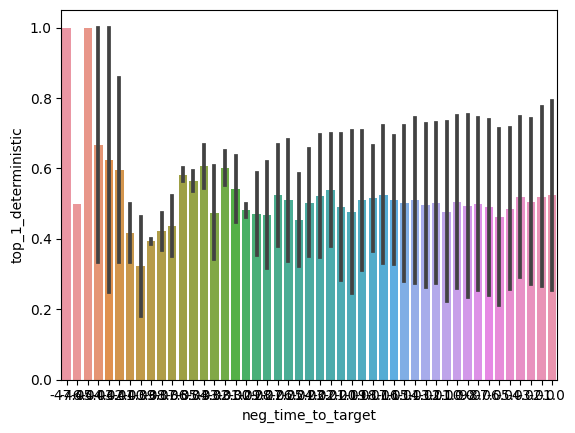

In [12]:
import seaborn as sns
df = results[results.is_current_target].groupby(['target', 'neg_time_to_target']).apply('mean').reset_index()
sns.barplot(data=df, x='neg_time_to_target', y='top_1_deterministic')
df

,target,neg_time_to_target,time_step,time_to_target,is_positive,is_current_target,top_1,top_2,top_5,top_1_deterministic,top_2_deterministic,top_5_deterministic,episode_idx
0,pneumonia,-44.0,1.000000,44.0,1.0,1.0,0.333333,1.0,1.0,0.333333,1.0,1.0,4706.000000
1,pneumonia,-43.0,2.500000,43.0,1.0,1.0,0.500000,1.0,1.0,0.250000,1.0,1.0,4022.750000
2,pneumonia,-42.0,3.333333,42.0,1.0,1.0,0.500000,1.0,1.0,0.333333,1.0,1.0,4686.333333
3,pneumonia,-41.0,3.888889,41.0,1.0,1.0,0.555556,1.0,1.0,0.333333,1.0,1.0,4244.777778
4,pneumonia,-40.0,5.000000,40.0,1.0,1.0,0.545455,1.0,1.0,0.181818,1.0,1.0,3708.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,pulmonary edema,-5.0,26.391003,5.0,1.0,1.0,0.508651,1.0,1.0,0.256055,1.0,1.0,3637.152249
87,pulmonary edema,-4.0,26.192308,4.0,1.0,1.0,0.496795,1.0,1.0,0.291667,1.0,1.0,3659.801282
88,pulmonary edema,-3.0,26.105105,3.0,1.0,1.0,0.543544,1.0,1.0,0.270270,1.0,1.0,3665.423423
89,pulmonary edema,-2.0,26.452991,2.0,1.0,1.0,0.515670,1.0,1.0,0.264957,1.0,1.0,3652.421652


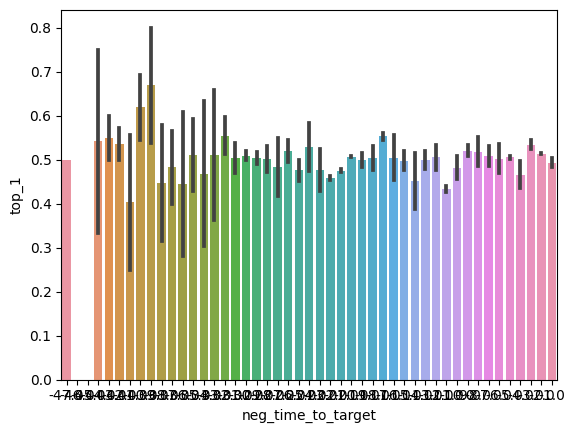

In [13]:
import seaborn as sns
df = results[results.is_current_target].groupby(['target', 'neg_time_to_target']).apply('mean').reset_index()
sns.barplot(data=df, x='neg_time_to_target', y='top_1')
df